In [31]:
 %matplotlib notebook
import pandas as pd
 import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [40]:
output_data = pd.read_csv('Output Data Clean.csv')
output_data.head()
output_data['Population Density'] = output_data['Population']/output_data['Land Area']
output_data['Total Crime'] = output_data['Violent Crime'] + output_data['Property Crime']
output_data['Citizens per Officer'] = output_data['Population']/output_data['Total Officers']
output_data['Officer per Square Mile'] = output_data['Total Officers'] / output_data['Land Area']
output_data['Total Crime Rate'] = output_data['Total Crime'] / output_data['Population'] * 100000
output_data['Violent Crime Rate'] = output_data['Violent Crime'] / output_data['Population'] * 100000
output_data['Property Crime Rate'] = output_data['Property Crime'] / output_data['Population'] * 100000
output_data.sort_values(by='Violent Crime', ascending=False).head()
#output_data = output_data.drop([21])
output_data = output_data.drop([36])
output_data.head()
output_data.sort_values(by='Total Crime Rate', ascending=True).head()

,County,County Type,Violent Crime,Murder and Nonnegligent Manslaughter,Forcible Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny - Theft,...,Total Officers,Population,Land Area,Population Density,Total Crime,Citizens per Officer,Officer per Square Mile,Total Crime Rate,Violent Crime Rate,Property Crime Rate
55,Trinity,Nonmetropolitan,34,0,4,3,27,98,33,65,...,15,13786,3179,4.336584,132,919.066667,0.004718,957.493109,246.627013,710.866096
48,Modoc,Nonmetropolitan,17,0,6,0,11,123,65,53,...,25,9686,3917,2.472811,140,387.440000,0.006382,1445.385092,175.511047,1269.874045
43,Inyo,Nonmetropolitan,69,0,4,4,61,223,81,136,...,46,18546,10180,1.821807,292,403.173913,0.004519,1574.463496,372.047881,1202.415615
38,Calaveras,Nonmetropolitan,82,1,10,12,59,654,282,361,...,52,45578,1020,44.684314,736,876.500000,0.050980,1614.814165,179.911361,1434.902804
3,El Dorado,Metropolitan,485,3,34,66,382,2614,1112,1460,...,230,181058,1707,106.067955,3099,787.208696,0.134739,1711.606226,267.869964,1443.736261


In [37]:
population = output_data.iloc[:,12]

In [38]:
total_crime = output_data.iloc[:,18]
tc_slope, tc_int, tc_r, tc_p, tc_std_err = stats.linregress(population,total_crime )
tc_fit = tc_slope * population + tc_int

<IPython.core.display.Javascript object>


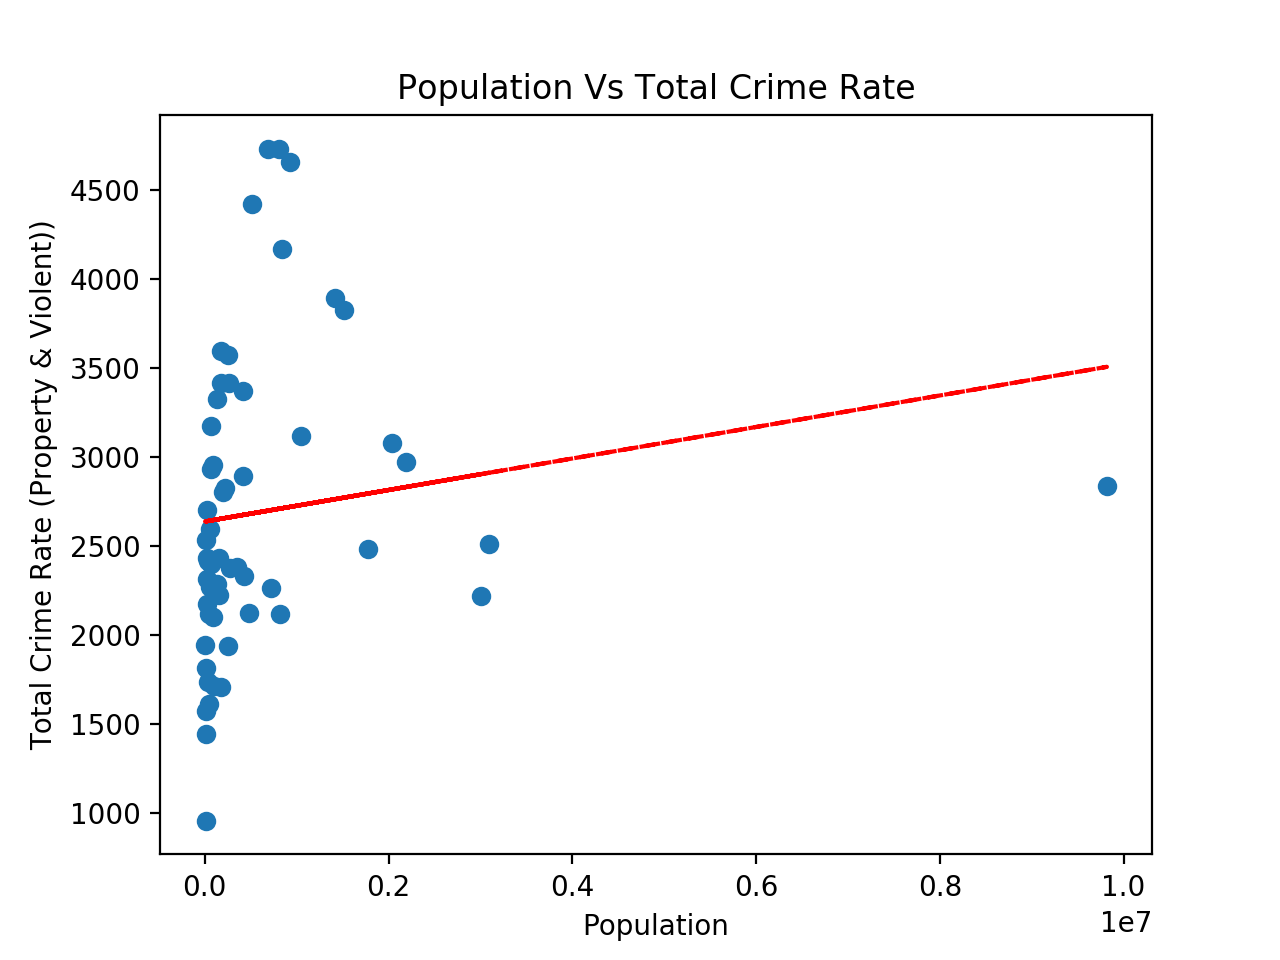

Text(0, 0.5, 'Total Crime Rate (Property & Violent))')

In [43]:

plt.scatter(population, total_crime)

z = np.polyfit(population, total_crime, 1)
p = np.poly1d(z)
plt.plot(population,p(population), 'r--')
plt.show()

plt.title("Population Vs Total Crime Rate")
plt.xlabel("Population")
plt.ylabel("Total Crime Rate (Property & Violent))") 

In [29]:
np.corrcoef(population, total_crime)

array([[1.        , 0.02297959],
       [0.02297959, 1.        ]])

In [42]:
plt.savefig("../Images/population vs total crime")